**Handling Missing Data with Pandas**

In [1]:
import numpy as np
import pandas as pd

Pandas utility functions

Similarly to numpy, pandas also has a few utility functions to identify and detect null values:

In [2]:
pd.isnull(np.nan)

True

In [3]:
pd.isnull(None)

True

In [4]:
pd.isna(None)

True

In [5]:
pd.notnull(None)

False

In [6]:
pd.notnull(np.nan)

False

In [7]:
pd.notna(np.nan)

False

In [8]:
pd.notnull(3)

True

These functions also work with Series and DataFrames:

In [9]:
pd.isnull(pd.Series([1, np.nan, 7]))

0    False
1     True
2    False
dtype: bool

In [10]:
pd.notnull(pd.Series([1, np.nan, 7]))

0     True
1    False
2     True
dtype: bool

In [11]:
pd.isnull(pd.DataFrame({
    'Column A': [1, np.nan, 7],
    'Column B': [np.nan, 2, 3],
    'Column C': [np.nan, 2, np.nan]
}))

,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True


**Pandas Operations with Missing Values**

Pandas manages missing values more gracefully than numpy. nans will no longer behave as "viruses", and operations will just ignore them completely:

In [12]:
pd.Series([1, 2, np.nan]).count()

2

In [13]:
pd.Series([1, 2, np.nan]).sum()

3.0

In [14]:
pd.Series([2, 2, np.nan]).mean()

2.0

**Filtering missing data**

As we saw with numpy, we could combine boolean selection + pd.isnull to filter out those nans and null values:

In [15]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])

In [16]:
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [18]:
pd.isnull(s)

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [19]:
pd.notnull(s).sum()

4

In [20]:
pd.isnull(s).sum()

2

In [21]:
s[pd.notnull(s)]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [22]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [23]:
s.notnull()

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [24]:
s[s.notnull()]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

**Dropping null values**

Boolean selection + notnull() seems a little bit verbose and repetitive. And as we said before: any repetitive task will probably have a better, more DRY way. In this case, we can use the dropna method:

In [17]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [25]:
s.dropna()

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

**Dropping null values on DataFrames**

You saw how simple it is to drop nas with a Series. But with DataFrames, there will be a few more things to consider, because you can't drop single values. You can only drop entire columns or rows. Let's start with a sample DataFrame:

In [26]:
df = pd.DataFrame({
    'Column A': [1, np.nan, 30, np.nan],
    'Column B': [2, 8, 31, np.nan],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5, 8, 34, 110],
})
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [27]:
df.shape

(4, 4)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column A  2 non-null      float64
 1   Column B  3 non-null      float64
 2   Column C  3 non-null      float64
 3   Column D  4 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 256.0 bytes


In [29]:
df.isnull()

,Column A,Column B,Column C,Column D
0,False,False,True,False
1,True,False,False,False
2,False,False,False,False
3,True,True,False,False


In [30]:
df.isnull().sum()

Column A    2
Column B    1
Column C    1
Column D    0
dtype: int64

The default dropna behavior will drop all the rows in which any null value is present:

In [31]:
df.dropna()

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In [32]:
df.dropna(axis=1)

,Column D
0,5
1,8
2,34
3,110


In this case, any row or column that contains at least one null value will be dropped. Which can be, depending on the case, too extreme. You can control this behavior with the how parameter. Can be either 'any' or 'all':

In [33]:
df2 = pd.DataFrame({
    'Column A': [1, np.nan, 30],
    'Column B': [2, np.nan, 31],
    'Column C': [np.nan, np.nan, 100]
})


In [34]:
df2

,Column A,Column B,Column C
0,1.0,2.0,NaN
1,NaN,NaN,NaN
2,30.0,31.0,100.0


In [35]:
df.dropna(how='all')

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [36]:
df.dropna(how='any') 

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


You can also use the thresh parameter to indicate a threshold (a minimum number) of non-null values for the row/column to be kept:

In [37]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [38]:
df.dropna(thresh=3)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34


In [40]:
df.dropna(thresh=3, axis='columns')

,Column B,Column C,Column D
0,2.0,NaN,5
1,8.0,9.0,8
2,31.0,32.0,34
3,NaN,100.0,110


**Filling null values**

Sometimes instead than dropping the null values, we might need to replace them with some other value. This highly depends on your context and the dataset you're currently working. Sometimes a nan can be replaced with a 0, sometimes it can be replaced with the mean of the sample, and some other times you can take the closest value. Again, it depends on the context. We'll show you the different methods and mechanisms and you can then apply them to your own problem.

In [41]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

**Filling nulls with a arbitrary value**

In [42]:
s.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
5    4.0
dtype: float64

In [43]:
s.fillna(s.mean())

0    1.0
1    2.0
2    3.0
3    2.5
4    2.5
5    4.0
dtype: float64

In [44]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

**Filling nulls with contiguous (close) values**

The method argument is used to fill null values with other values close to that null one:

In [46]:
s.fillna(method='ffill')

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [47]:
s.fillna(method='bfill')

0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

This can still leave null values at the extremes of the Series/DataFrame:

In [48]:
pd.Series([np.nan, 3, np.nan, 9]).fillna(method='ffill')

0    NaN
1    3.0
2    3.0
3    9.0
dtype: float64

In [49]:
pd.Series([1, np.nan, 3, np.nan, np.nan]).fillna(method='bfill')

0    1.0
1    3.0
2    3.0
3    NaN
4    NaN
dtype: float64

**Filling null values on DataFrames**
The fillna method also works on DataFrames, and it works similarly. The main differences are that you can specify the axis (as usual, rows or columns) to use to fill the values (specially for methods) and that you have more control on the values passed:

In [50]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [51]:
df.fillna({'Column A': 0, 'Column B': 99, 'Column C': df['Column C'].mean()})

,Column A,Column B,Column C,Column D
0,1.0,2.0,47.0,5
1,0.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,0.0,99.0,100.0,110


In [53]:
df.fillna(method='ffill', axis=0)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,30.0,31.0,100.0,110


In [52]:
df.fillna(method='ffill', axis=1)

,Column A,Column B,Column C,Column D
0,1.0,2.0,2.0,5.0
1,NaN,8.0,9.0,8.0
2,30.0,31.0,32.0,34.0
3,NaN,NaN,100.0,110.0


**Cleaning not-null values**

After dealing with many datasets I can tell you that "missing data" is not such a big deal. The best thing that can happen is to clearly see values like np.nan. The only thing you need to do is just use methods like isnull and fillna/dropna and pandas will take care of the rest.

But sometimes, you can have invalid values that are not just "missing data" (None, or nan). For example:

In [54]:
df = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'D', '?'],
    'Age': [29, 30, 24, 290, 25],
})
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


The previous DataFrame doesn't have any "missing value", but clearly has invalid data. 290 doesn't seem like a valid age, and D and ? don't correspond with any known sex category. How can you clean these not-missing, but clearly invalid values then?

**Finding Unique Values**
The first step to clean invalid values is to notice them, then identify them and finally handle them appropriately (remove them, replace them, etc). Usually, for a "categorical" type of field (like Sex, which only takes values of a discrete set ('M', 'F')), we start by analyzing the variety of values present. For that, we use the unique() method:

In [55]:
df['Sex'].unique()

array(['M', 'F', 'D', '?'], dtype=object)

In [56]:
df['Sex'].value_counts()

F    2
?    1
D    1
M    1
Name: Sex, dtype: int64

Clearly if you see values like 'D' or '?', it'll immediately raise your attention. Now, what to do with them? Let's say you picked up the phone, called the survey company and they told you that 'D' was a typo and it should actually be F. You can use the replace function to replace these values:

In [57]:
df['Sex'].replace('D', 'F')

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

In [58]:
df['Sex'].replace({'D': 'F', 'N': 'M'})

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

If you have many columns to replace, you could apply it at "DataFrame level":

In [60]:
df.replace({
    'Sex': {
        'D': 'F',
        'N': 'M'
    },
    'Age': {
        290: 29
    }
})

,Sex,Age
0,M,29
1,F,30
2,F,24
3,F,29
4,?,25


In the previous example, I explicitly replaced 290 with 29 (assuming it was just an extra 0 entered at data-entry phase). But what if you'd like to remove all the extra 0s from the ages columns? (example, 150 > 15, 490 > 49).

The first step would be to just set the limit of the "not possible" age. Is it 100? 120? Let's say that anything above 100 isn't credible for our dataset. We can then combine boolean selection with the operation:

In [61]:
df[df['Age'] > 100]

,Sex,Age
3,D,290


And we can now just divide by 10:

In [62]:
df.loc[df['Age'] > 100, 'Age'] = df.loc[df['Age'] > 100, 'Age'] / 10
df

,Sex,Age
0,M,29.0
1,F,30.0
2,F,24.0
3,D,29.0
4,?,25.0


**Duplicates**

Checking duplicate values is extremely simple. It'll behave differently between Series and DataFrames. Let's start with Series. As an example, let's say we're throwing a fancy party and we're inviting Ambassadors from Europe. But can only invite one ambassador per country. This is our original list, and as you can see, both the UK and Germany have duplicated ambassadors:

In [63]:
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth '
])
ambassadors

Gérard Araud                  France
Kim Darroch           United Kingdom
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
Peter Ammon                  Germany
Klaus Scharioth              Germany
dtype: object

The two most important methods to deal with duplicates are duplicated (that will tell you which values are duplicates) and drop_duplicates (which will just get rid of duplicates):

In [64]:
ambassadors.duplicated()

Gérard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig          False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In this case duplicated didn't consider 'Kim Darroch', the first instance of the United Kingdom or 'Peter Wittig' as duplicates. That's because, by default, it'll consider the first occurrence of the value as not-duplicate. You can change this behavior with the keep parameter:

In [65]:
ambassadors.duplicated(keep='last')

Gérard Araud          False
Kim Darroch            True
Peter Westmacott      False
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth       False
dtype: bool

In this case, the result is "flipped", 'Kim Darroch' and 'Peter Wittig' (the first ambassadors of their countries) are considered duplicates, but 'Peter Westmacott' and 'Klaus Scharioth' are not duplicates. You can also choose to mark all of them as duplicates with keep=False:

In [66]:
ambassadors.duplicated(keep=False)

Gérard Araud          False
Kim Darroch            True
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

A similar method is drop_duplicates, which just excludes the duplicated values and also accepts the keep parameter:

In [67]:
ambassadors.drop_duplicates()

Gérard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
dtype: object

In [68]:
ambassadors.drop_duplicates(keep='last')

Gérard Araud                  France
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Klaus Scharioth              Germany
dtype: object

In [69]:
ambassadors.drop_duplicates(keep=False)

Gérard Araud          France
Armando Varricchio     Italy
dtype: object

**Duplicates in DataFrames**

Conceptually speaking, duplicates in a DataFrame happen at "row" level. Two rows with exactly the same values are considered to be duplicates:

In [70]:
players = pd.DataFrame({
    'Name': [
        'Kobe Bryant',
        'LeBron James',
        'Kobe Bryant',
        'Carmelo Anthony',
        'Kobe Bryant',
    ],
    'Pos': [
        'SG',
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})
players

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
2,Kobe Bryant,SG
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In the previous DataFrame, we clearly see that Kobe is duplicated; but he appears with two different positions. What does duplicated say?

In [71]:
players.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

Again, conceptually, "duplicated" means "all the column values should be duplicates". We can customize this with the subset parameter:

In [73]:
players.duplicated(subset=['Name'])

0    False
1    False
2     True
3    False
4     True
dtype: bool

And the same rules of keep still apply:

In [74]:
players.duplicated(subset=['Name'], keep='last')

0     True
1    False
2     True
3    False
4    False
dtype: bool

drop_duplicates takes the same parameters:

In [75]:
players.drop_duplicates()

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [76]:
players.drop_duplicates(subset=['Name'])

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF


In [77]:
players.drop_duplicates(subset=['Name'], keep='last')

,Name,Pos
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


**Text Handling**

Cleaning text values can be incredibly hard. Invalid text values involves, 99% of the time, mistyping, which is completely unpredictable and doesn't follow any pattern. Thankfully, it's not so common these days, where data-entry tasks have been replaced by machines. Still, let's explore the most common cases:

**Splitting Columns**

The result of a survey is loaded and this is what you get:

In [79]:
df = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})

In [80]:
df

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


You know that the single columns represent the values "year, Sex, Country and number of children", but it's all been grouped in the same column and separated by an underscore. Pandas has a convenient method named split that we can use in these situations:

In [81]:
df['Data'].str.split('_')

0       [1987, M, US , 1]
1       [1990?, M, UK, 1]
2        [1992, F, US, 2]
3    [1970?, M,    IT, 1]
4      [1985, F, I  T, 2]
Name: Data, dtype: object

In [82]:
df['Data'].str.split('_', expand=True)

,0,1,2,3
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [83]:
df = df['Data'].str.split('_', expand=True)

In [84]:
df.columns = ['Year', 'Sex', 'Country', 'No Children']

You can also check which columns contain a given value with the contains method:

In [85]:
df

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [86]:
df['Year'].str.contains('\?')

0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

contains takes a regex/pattern as first value, so we need to escape the ? symbol as it has a special meaning for these patterns. Regular letters don't need escaping:

In [87]:
df['Country'].str.contains('U')

0     True
1     True
2     True
3    False
4    False
Name: Country, dtype: bool

Removing blank spaces (like in 'US ' or 'I  T' can be achieved with strip (lstrip and rstrip also exist) or just replace:

In [88]:
df['Country'].str.strip()

0      US
1      UK
2      US
3      IT
4    I  T
Name: Country, dtype: object

In [89]:
df['Country'].str.replace(' ', '')

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

As we said, replace and contains take regex patterns, which can make it easier to replace values in bulk:

In [90]:
df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'))

0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object

**More Visualizations**

In [91]:
import matplotlib.pyplot as plt

%matplotlib inline

Global API
Matplotlib's default pyplot API has a global, MATLAB-style interface, as we've already seen:

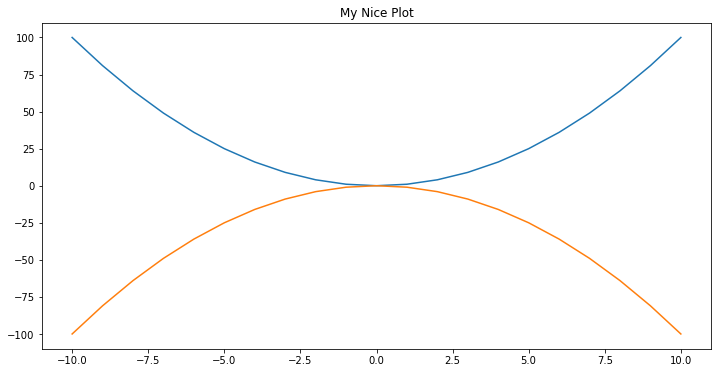

In [92]:
x = np.arange(-10, 11)
plt.figure(figsize=(12, 6))

plt.title('My Nice Plot')

plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

Text(0, 0.5, 'X Squared')

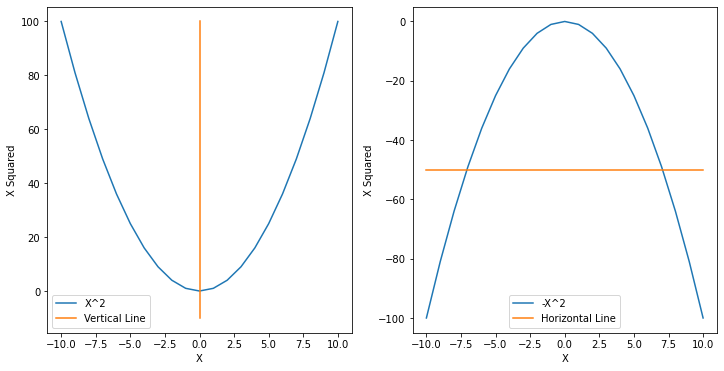

In [93]:
plt.figure(figsize=(12, 6))
plt.title('My Nice Plot')

plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1, 2, 2)
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

**OOP interface**

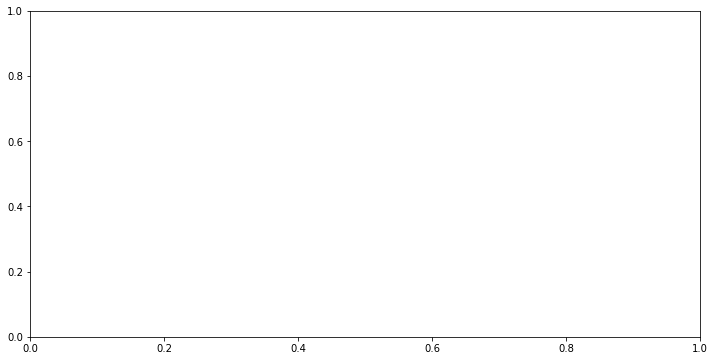

In [94]:
fig, axes = plt.subplots(figsize=(12, 6))

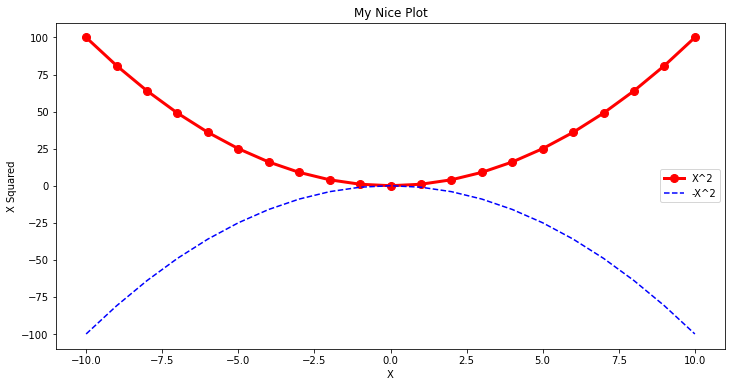

In [95]:
axes.plot(
    x, (x ** 2), color='red', linewidth=3,
    marker='o', markersize=8, label='X^2')

axes.plot(x, -1 * (x ** 2), 'b--', label='-X^2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title("My Nice Plot")

axes.legend()

fig

Text(0.5, 1.0, 'My Nice Plot')

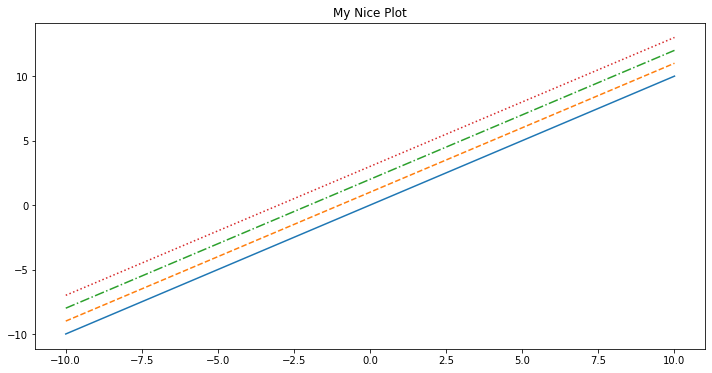

In [96]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, linestyle='solid')
axes.plot(x, x + 1, linestyle='dashed')
axes.plot(x, x + 2, linestyle='dashdot')
axes.plot(x, x + 3, linestyle='dotted');

axes.set_title("My Nice Plot")

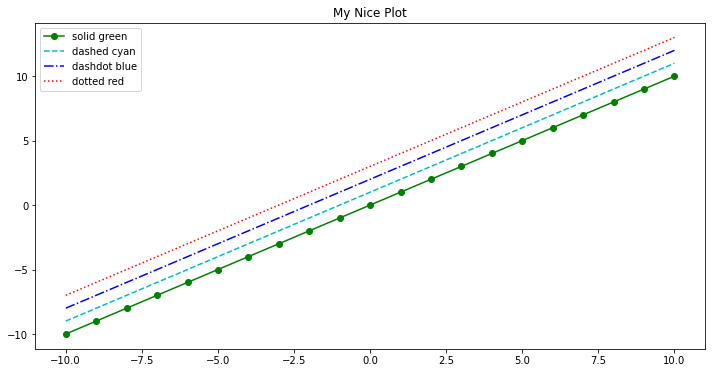

In [97]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, '-og', label="solid green")
axes.plot(x, x + 1, '--c', label="dashed cyan")
axes.plot(x, x + 2, '-.b', label="dashdot blue")
axes.plot(x, x + 3, ':r', label="dotted red")

axes.set_title("My Nice Plot")

axes.legend()

There are a lot of line and marker types.

In [98]:
print('Markers: {}'.format([m for m in plt.Line2D.markers]))

Markers: ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', None, ' ', '']


In [99]:
linestyles = ['_', '-', '--', ':']

print('Line styles: {}'.format(linestyles))

Line styles: ['_', '-', '--', ':']


**Other types of plots**


Figures and subfigures

When we call the subplots() function we get a tuple containing a Figure and a axes element.

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

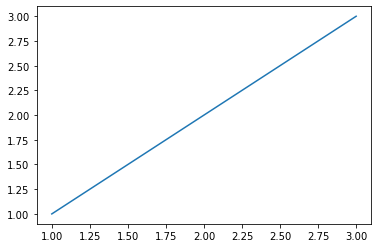

In [100]:
plot_objects = plt.subplots()

fig, ax = plot_objects

ax.plot([1,2,3], [1,2,3])

plot_objects

We can also define how many elements we want inside our figure. To do that we can set the nrows and ncols params.

(<Figure size 1008x432 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

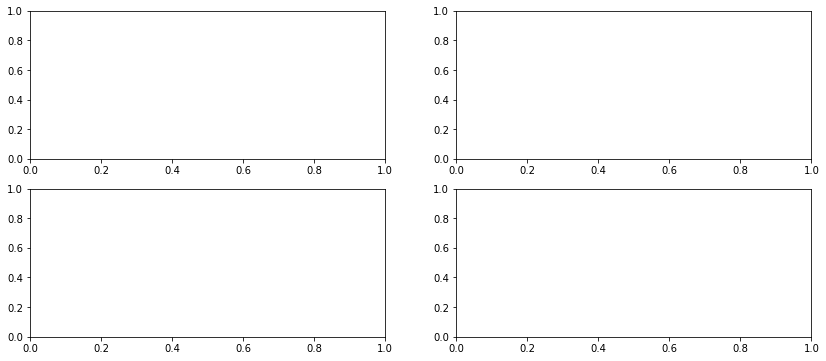

In [101]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

plot_objects

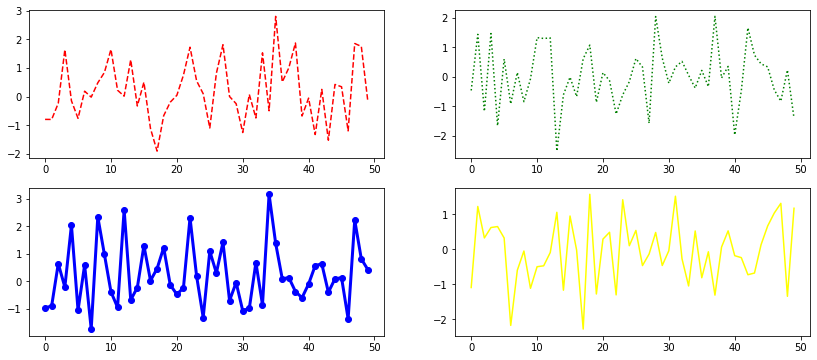

In [102]:
ax4.plot(np.random.randn(50), c='yellow')
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')
ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=3.0)


fig

**The subplot2grid command**

There is another way to make subplots using a grid-like format:

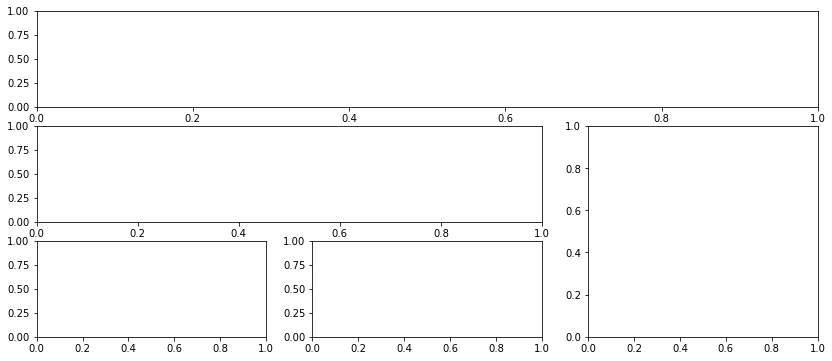

In [103]:
plt.figure(figsize=(14, 6))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))

**Scatter Plot**

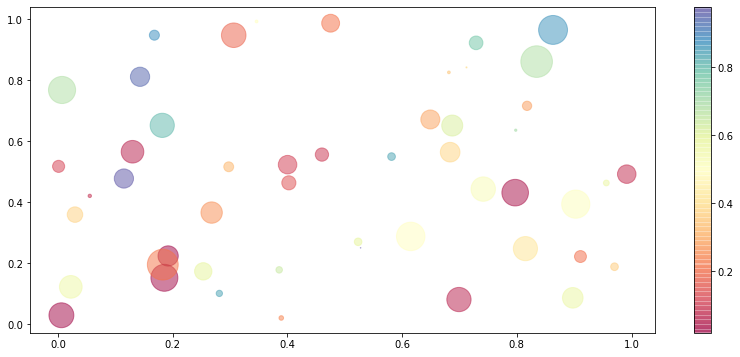

In [104]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2  # 0 to 15 point radii
plt.figure(figsize=(14, 6))

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

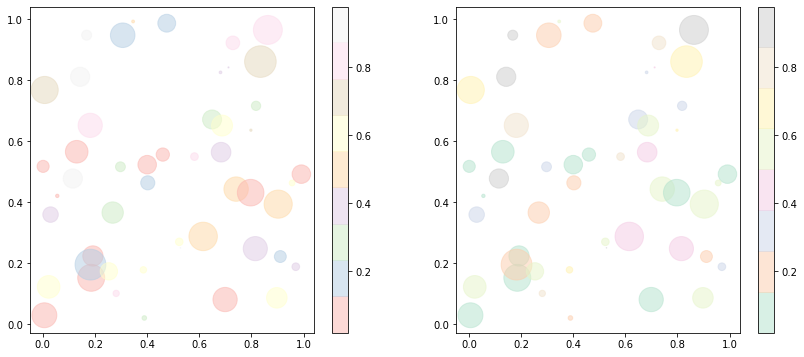

In [105]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel1')
plt.colorbar()

ax2 = fig.add_subplot(1,2,2)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel2')
plt.colorbar()

plt.show()

**Histograms**

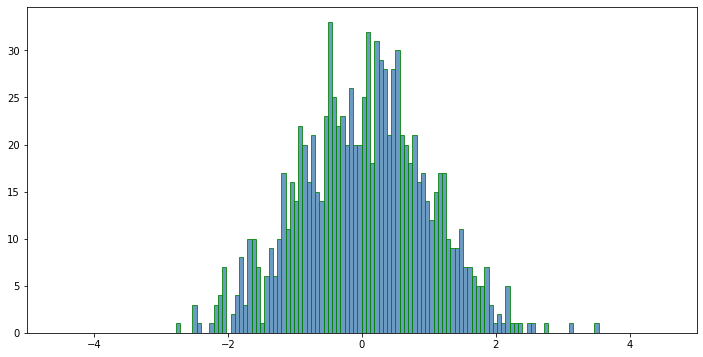

In [106]:
values = np.random.randn(1000)
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')
plt.xlim(xmin=-5, xmax=5)

plt.show()

**KDE (kernel density estimation)**

In [107]:
from scipy import stats

density = stats.kde.gaussian_kde(values)
density

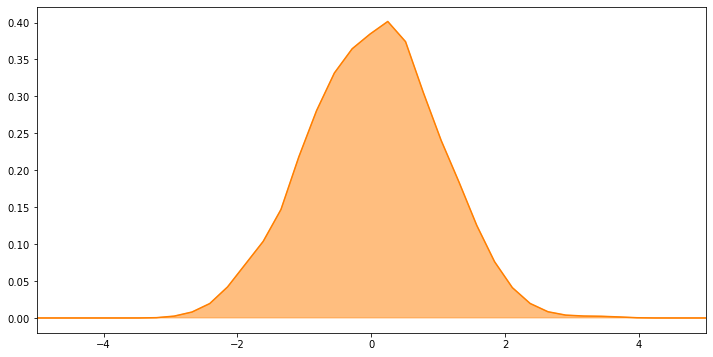

In [108]:
plt.subplots(figsize=(12, 6))

values2 = np.linspace(min(values)-10, max(values)+10, 100)

plt.plot(values2, density(values2), color='#FF7F00')
plt.fill_between(values2, 0, density(values2), alpha=0.5, color='#FF7F00')
plt.xlim(xmin=-5, xmax=5)

plt.show()

**Combine plots**

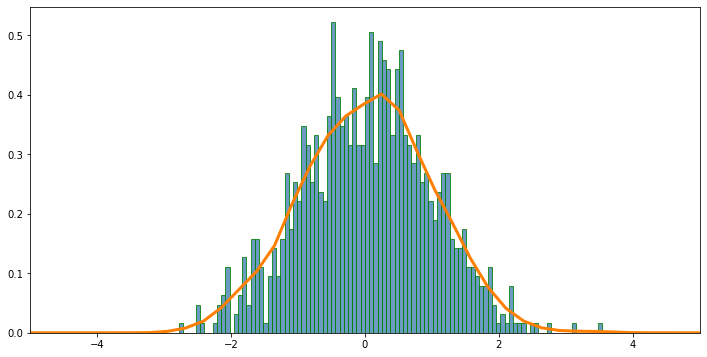

In [110]:
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8, density=1,
          histtype='bar', color='steelblue',
          edgecolor='green')

plt.plot(values2, density(values2), color='#FF7F00', linewidth=3.0)
plt.xlim(xmin=-5, xmax=5)

plt.show()

**Bar plots**

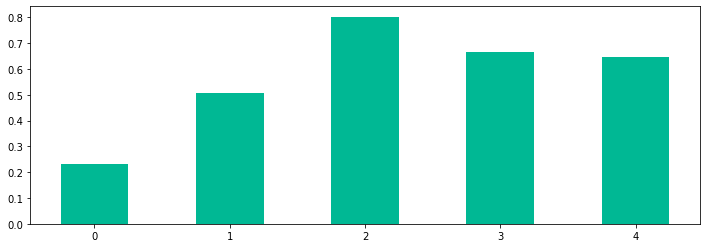

In [112]:
Y = np.random.rand(1, 5)[0]
Y2 = np.random.rand(1, 5)[0]
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894')

plt.show()

Also can be stacked bars, and add a legend to the plot:

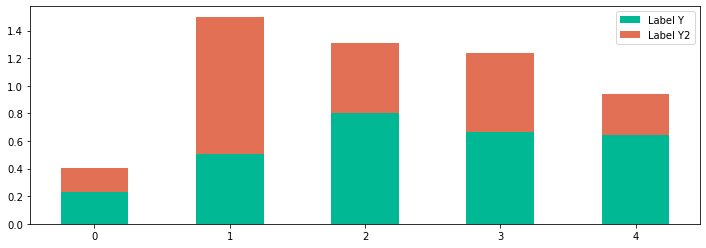

In [113]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894', label='Label Y')
plt.bar(np.arange(len(Y2)), Y2, width=barWidth, color='#e17055', bottom=Y, label='Label Y2')

plt.legend()
plt.show()

**Boxplots and outlier detection**

(array([1., 1., 0., 0., 6., 4., 0., 0., 1., 1.]),
 array([-15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.]),
 <BarContainer object of 10 artists>)

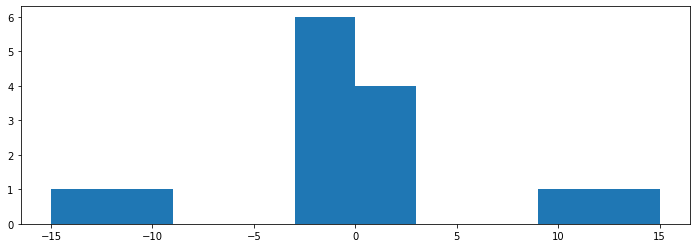

In [114]:
values = np.concatenate([np.random.randn(10), np.array([10, 15, -10, -15])])
plt.figure(figsize=(12, 4))

plt.hist(values)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c608bf7250>,
 'caps': [<matplotlib.lines.Line2D at 0x1c608d99f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c608bf7c10>],
 'medians': [<matplotlib.lines.Line2D at 0x1c608d99520>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c608bea1c0>],
 'means': []}

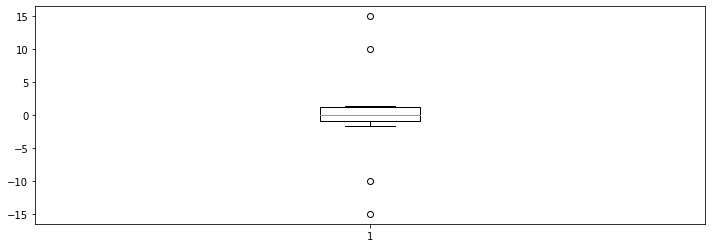

In [115]:
plt.figure(figsize=(12, 4))

plt.boxplot(values)